## part zero: kernels

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from retinaface import RetinaFace
import shutil

In [4]:
def apply_convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

In [5]:
# Define kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
left_sobel_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
blur_kernel = np.ones((3, 3), np.float32) / 9
random_kernel = np.random.rand(3, 3)

In [6]:
# Load an image
image = cv2.imread('input_images/Spain_national_under-21_football_team_2011.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

In [7]:
# Apply convolutions
identity_result = apply_convolution(image, identity_kernel)
left_sobel_result = apply_convolution(image, left_sobel_kernel)
blur_result = apply_convolution(image, blur_kernel)
random_result = apply_convolution(image, random_kernel)

In [ ]:
# Display results/
plt.imshow( image)

In [ ]:
plt.imshow( identity_result)

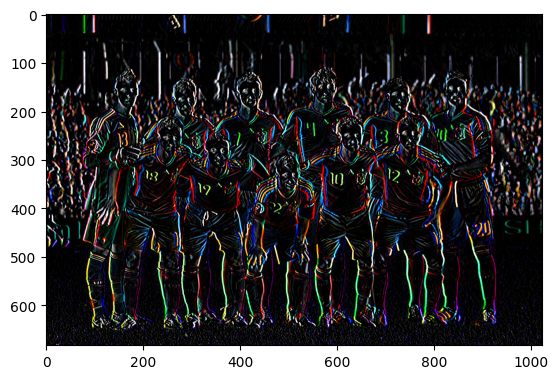

In [8]:
plt.imshow( left_sobel_result)

In [ ]:
plt.imshow( blur_result)

In [ ]:
plt.imshow( random_result)

## part 2 & 3: face filters with oop 

In [65]:
class FaceFilteringApp:
    def __init__(self):
        pass

    def is_color_image(self,image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(image)
        if (np.mean(s)<20):
            return False
        else:
            return True
    
    
    def detect_faces(self, image_path):
        faces = RetinaFace.detect_faces(image_path)
        return faces
    
    
    def extract_face_features(self, image_path):
        faces = self.detect_faces(image_path)
        features = []
        for face in faces.values():
            landmarks = face['landmarks']
            features.append(landmarks)
        return features
    
    def is_front_pose(self, image_path):
        faces=self.detect_faces(image_path)
        for i, face in enumerate(faces.values()):
            landmarks = face['landmarks']
            right_eye = landmarks['right_eye']
            left_eye = landmarks['left_eye']
            nose = landmarks['nose']
            mouth_right = landmarks['mouth_right']
            mouth_left = landmarks['mouth_left']

            threshold = 10

            if abs(left_eye[1] - right_eye[1]) < threshold and abs(mouth_left[1] - mouth_right[1]) <threshold:
                print(f'face{i+1} in picture {image_path} is front pose')
            else:
                print(f'face{i+1} in picture {image_path} is not front pose')


    def front_pose_directory(self, image_path):
        faces=self.detect_faces(image_path)
        for i, face in enumerate(faces.values()):
            landmarks = face['landmarks']
            right_eye = landmarks['right_eye']
            left_eye = landmarks['left_eye']
            nose = landmarks['nose']
            mouth_right = landmarks['mouth_right']
            mouth_left = landmarks['mouth_left']

            threshold = 10
            if not(abs(left_eye[1] - right_eye[1]) < threshold and abs(mouth_left[1] - mouth_right[1]) <threshold):
                print(f"{image_path} will not copy because it's not all person frontal faced")
                break
            elif len(faces)==i+1:
                shutil.copy(f'{image_path}', '../copyDirectory')
                print(f"{image_path} will copy because it's all person frontal faced")

In [66]:
app1 = FaceFilteringApp()

# part 3 section 1

In [ ]:
for filename in os.listdir('./faces'):
    if app1.is_color_image(f'./faces/{filename}')==False:
        print(f'./faces/{filename} is grayscale')
        os.remove(f'./faces/{filename}')
    else:
        print(f'./faces/{filename} is not grayscale')    
    

# part 3 section 2

In [ ]:
for filename in os.listdir('./faces'):
    app1.detect_faces(f'./faces/{filename}')

# part 3 section 3

In [1]:
for filename in os.listdir('./faces'):
    print(f"{filename} faces  features is {app1.detect_faces(f'./faces/{filename}')} \n")
    
# instance:
# print(f"1.jpg faces  features is {app1.detect_faces('./faces/1.jpg')} \n") 

NameError: name 'os' is not defined

# part 3 section 4 

In [69]:
# for filename in os.listdir('./faces'):
#     app1.is_front_pose(f'./faces/{filename}')

#instance:
app1.is_front_pose('./faces/1.jpg')
app1.is_front_pose('./faces/4.jpeg')    

face1 in picture ./faces/1.jpg is front pose
face2 in picture ./faces/1.jpg is front pose
face3 in picture ./faces/1.jpg is front pose
face4 in picture ./faces/1.jpg is front pose
face5 in picture ./faces/1.jpg is front pose
face6 in picture ./faces/1.jpg is front pose
face7 in picture ./faces/1.jpg is front pose
face8 in picture ./faces/1.jpg is not front pose
face9 in picture ./faces/1.jpg is front pose
face10 in picture ./faces/1.jpg is front pose
face11 in picture ./faces/1.jpg is front pose
face12 in picture ./faces/1.jpg is front pose
face1 in picture ./faces/4.jpeg is front pose


# part 3 section 5

In [68]:
# for filename in os.listdir('./faces'):
#     app1.front_pose_directory(f'./faces/{filename}')

#instance:
app1.front_pose_directory('./faces/1.jpg')
app1.front_pose_directory('./faces/4.jpeg')

./faces/1.jpg will not copy because it's not all person frontal faced
./faces/4.jpeg will copy because it's all person frontal faced
